# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#code snippet to limit the number of decimal points shown on pandas calculations
pd.options.display.float_format = '{:.2f}'.format

import warnings

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Understanding the structure of the data

In [3]:
# Read the data
df = pd.read_csv('foodhub_order.csv')

In [4]:
# View the first 5 rows
df.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [5]:
#Checking how many rows and columns the data set has
print(f'The data set "df" has: \n{df.shape[0]}\t Rows \n{df.shape[1]}\t Columns')

The data set "df" has: 
1898	 Rows 
9	 Columns


#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [6]:
# Checking the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


### Observations:
- order_id, customer_id, food_preparation_time and delivery_time are int64 type for whole numbers as expected.
- restaurant_name and cuisine_type are object type (string probably?) as expected.
- cost_of_the_order is a float64 as expected for a price including dollars and cents.
- day_of_the_week and rating at first sight seems a little odd, considering that day_of_the_week could be a date type (but need to be checked later while analyzing the data) and rating that is expected to be a int64 type (rating 0/5 maybe?, there is some missing data?)

#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [7]:
##Checking if there are any missing values in the data set
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [8]:
# Cheking the amount of unique data point per columns. 
df.nunique()

order_id                 1898
customer_id              1200
restaurant_name           178
cuisine_type               14
cost_of_the_order         312
day_of_the_week             2
rating                      4
food_preparation_time      16
delivery_time              19
dtype: int64

#### Observations:
- There is no missing data on the dataframe. But some columns contain only a few different values like rating, or day of the week.
- For day of the week is expected to have at maximum 2 unique values as per column description (weekday and Weekend)
- For column rating, the values are only 4 when we should be expecting 5 or 6 (depending on which rating scale is used, 1 -> 5, 0->5) in any case it may indicate for now that some of the data is not being rated, or are being rated either too low or too high. It might need more detailed analysis later and if needed deletion of the not given rating.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [9]:
#Checking some statistics of the data set
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.00,NaN,NaN,NaN,1477495.50,548.05,1476547.00,1477021.25,1477495.50,1477969.75,1478444.00
customer_id,1898.00,NaN,NaN,NaN,171168.48,113698.14,1311.00,77787.75,128600.00,270525.00,405334.00
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.00,NaN,NaN,NaN,16.50,7.48,4.47,12.08,14.14,22.30,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.00,NaN,NaN,NaN,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.00,NaN,NaN,NaN,24.16,4.97,15.00,20.00,25.00,28.00,33.00


#### Observations:
- According to the data, the minimum time to prepare a food was 20 minutes, the average time is 27.37 minutes while the maximum time was 35 minutes.



### **Question 5:** How many orders are not rated? [1 mark]

In [10]:
# Checking how many order are not rated
df['rating'].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

#### Observations:
- According to the data we have 736 orders where a rating was given. On top of that we can see that the minimum rating was 3 and the maximum is 5.
- As it was explained before. From this data we can't tell what's the minimum rating an order can get as no 0, 1 or 2 ratings are present.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

order_id    

In [11]:
print(f"There are a total of {df['order_id'].nunique()} orders, while there are {df['order_id'].duplicated().sum()} duplicates")

There are a total of 1898 orders, while there are 0 duplicates


customer_id

In [12]:
print(f"There are a total of {df['customer_id'].nunique()} unique customers, while there are {df['customer_id'].duplicated().sum()} customers that ordered more than once")


There are a total of 1200 unique customers, while there are 698 customers that ordered more than once


restaurant_name

In [13]:
print(f"There are a total of {df['restaurant_name'].nunique()} restaurants")


There are a total of 178 restaurants


cuisine_type

There are 14 types of cuisine in the data


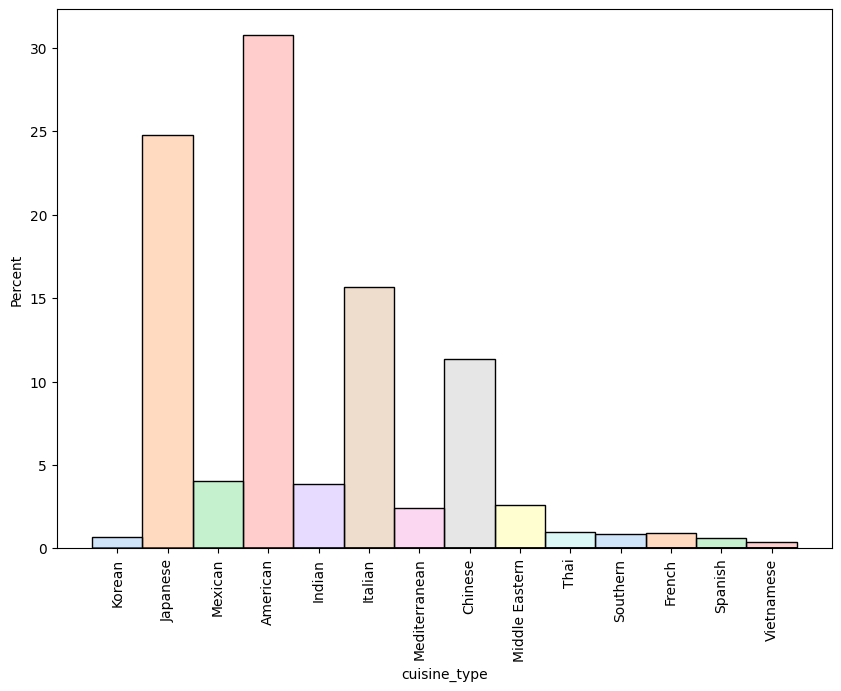

In [14]:
print(f'There are {df["cuisine_type"].nunique()} types of cuisine in the data')
plt.figure(figsize=(10,7))
sns.histplot(data=df, x="cuisine_type", hue="cuisine_type", palette='pastel',legend=False,stat='percent')
plt.xticks(rotation=90);

The majority of orders are for American, Japanese and Italian food. While American represent the maximum with more than 30% of the orders.


cost_of_the_order

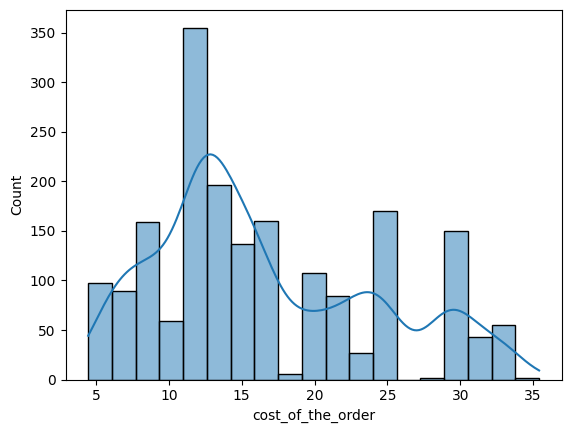

In [15]:
sns.histplot(data=df, x='cost_of_the_order', kde=True);

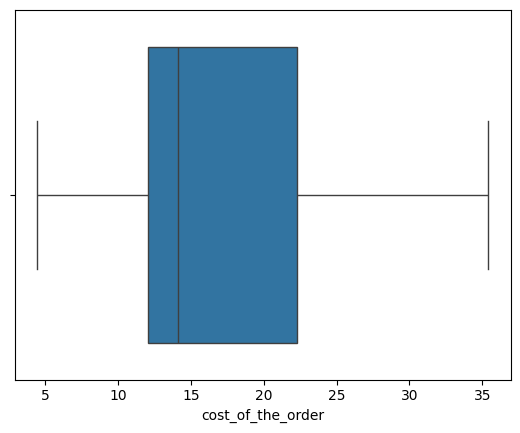

In [16]:
sns.boxplot(data=df, x='cost_of_the_order');

Here we can that the minimum cost was about 5 dollars, while the maximum is around 35 dollars (real 4,47 and 35,41 from stats data). The median (14.14) is closer to the Q1 (12.08) showing a positive skew with no outliers.


Day of the week

The column days_of_the_week has 2 unique values. There are 0 null values


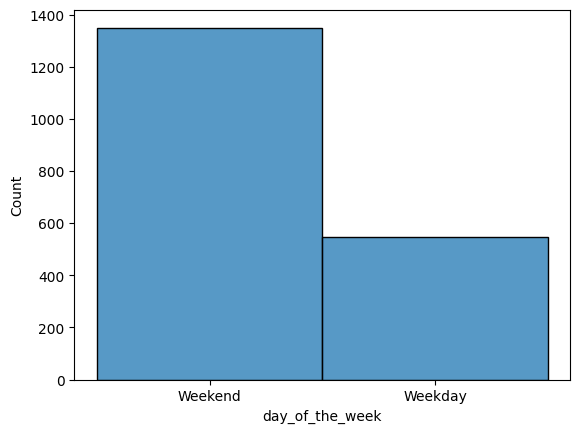

In [17]:
print(f'The column days_of_the_week has {df["day_of_the_week"].nunique()} unique values. There are {df["day_of_the_week"].isnull().sum()} null values')
sns.histplot(data=df, x='day_of_the_week');

From this data we can tell that the majority of orders are done on the weekend


rating

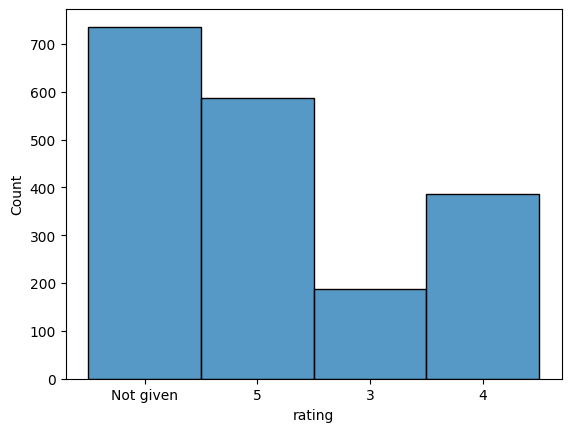

In [18]:
sns.histplot(data=df, x='rating');


As stated before, the majority of orders were not rated. Also is important to notice that from this data we can not tell what was the original rating scale ( 1-5? 0-5?) as the only data we have are rating of 3, 4, 5 or not rated.


food_preparation_time

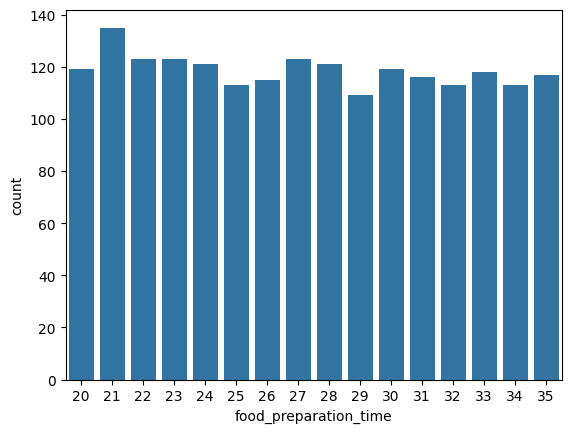

In [19]:
sns.countplot(data=df, x='food_preparation_time');


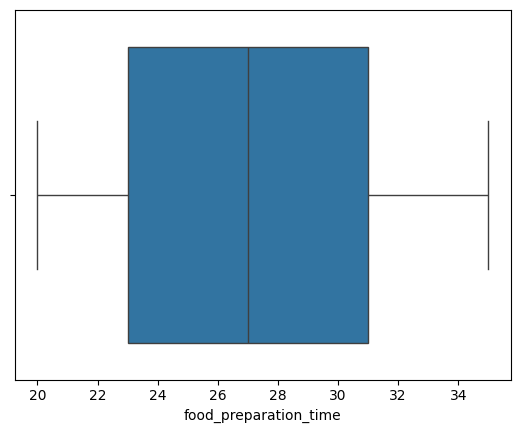

In [20]:
sns.boxplot(data=df, x='food_preparation_time');


From the data in the boxplot we can say that the preparation time follows an almost normal distribution (median is almost at the same distance from Q1 and Q3). While checking the countplot we can tell that almost all the preparation times are almost equally represented in the data.


delivery_time

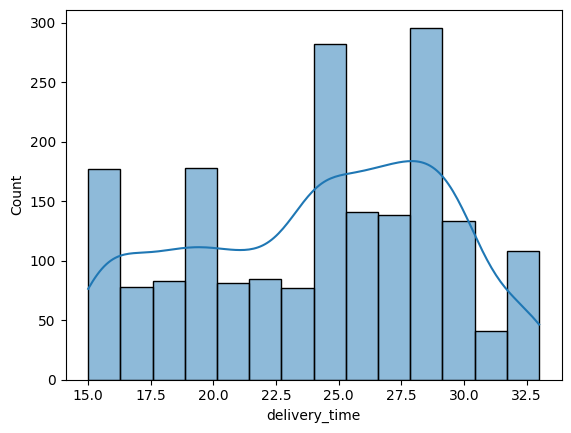

In [21]:
sns.histplot(data=df, x='delivery_time', kde=True);


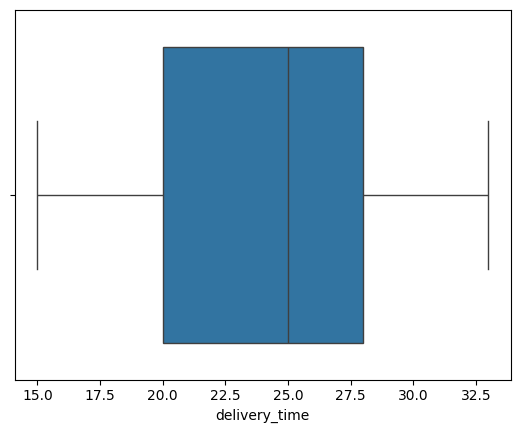

In [22]:
sns.boxplot(data=df, x='delivery_time');


As confirmed with the stat data, the median of the delivery time is 25 minutes, while the mean was 24.16 minutes. According to the boxplot, the data has a small negative skew (median is closer to Q3 than to Q1)

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [23]:
# Need to get the names of the restaurant that are repeated the most in the data, and from them get the top 5. 
# Checking the sum of each value with .value_count() and then extracting only the top 5 with .head(5)
df['restaurant_name'].value_counts().head(5)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

#### Observations:
From this analysis we can tell that the top 5 restaurants in terms of order received are

1. Shake Shack with 219 orders
2. The Meatball Shop with 132 orders
3. Blue Ribbon Sushi with 119 orders
4. Blue Ribbon Fried Chicken with 96 orders
5. Parm with 68 orders

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [24]:
#Creating a new dataframe containing only the information from Weekends
#Then as before extracting the value_count() and head() to check which kind of cuisine is most repeated on this new dataframe
weekend_info = df[df['day_of_the_week'] == 'Weekend'].copy()
weekend_info['cuisine_type'].value_counts().head(3)

cuisine_type
American    415
Japanese    335
Italian     207
Name: count, dtype: int64

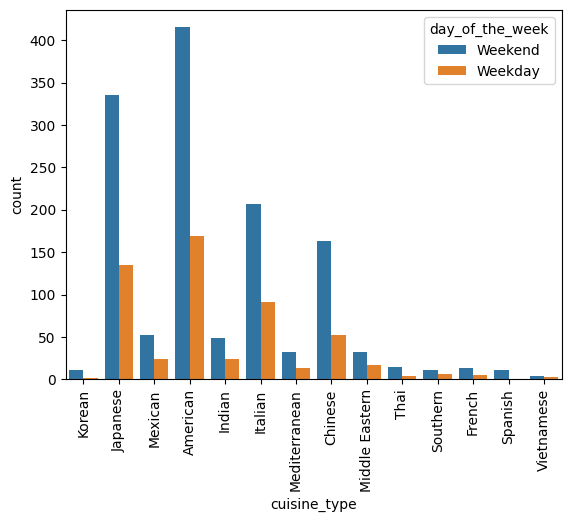

In [25]:
# PLotting a countplot with each cuisine type and using the day_of_the_week column as hue
sns.countplot(data=df, x='cuisine_type', hue='day_of_the_week')
plt.xticks(rotation=90);

#### Observations:
- We can tell from the data that the most popular food on the weekends is the american food with 415 orders

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [26]:
# Create a new dataframe that contain only the orders that cost more than 20 dollars
more20 = df[df['cost_of_the_order']>20].copy()
#Divide the number of orders over 20 dollars by the total of orders to obtain a percentage. Used python's .round() to show only 2 decimals on the answer
print(f'The number of orders that cost more than $20 are {more20.shape[0]} which represent a {round(more20.shape[0]/df.shape[0]*100,2)}% of the orders')

The number of orders that cost more than $20 are 555 which represent a 29.24% of the orders


#### Observations:
- The amount of orders over $20 is 555 which represents 29.24% of the orders.



### **Question 10**: What is the mean order delivery time? [1 mark]

In [27]:
#The mean delivery time is extracted using pd.mean() from the 'delivery_time' column.
#Using python's round() to show only 2 decimals. 
print(f'The mean order delivery time is {round(df["delivery_time"].mean(),2)} minutes')

The mean order delivery time is 24.16 minutes


#### Observations:
- The mean of the delivery time is 24.16 minutes as is was also stated in the stat data.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [28]:
# Extracting the most repeated customer IDs from the 'customer_id' columns with .value_counts().
#Getting the top 3 customers with .head(3)
df['customer_id'].value_counts().head(3)

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

#### Observations:
The top 3 clients that could receive a 20% discount voucher are

- 52832 with 13 orders
- 47440 with 10 orders
- 83287 witn 9 orders

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


Cuisine type

- Day of the week
- Cost of the order
- Delivery time
- Rating

<Axes: xlabel='cuisine_type', ylabel='count'>

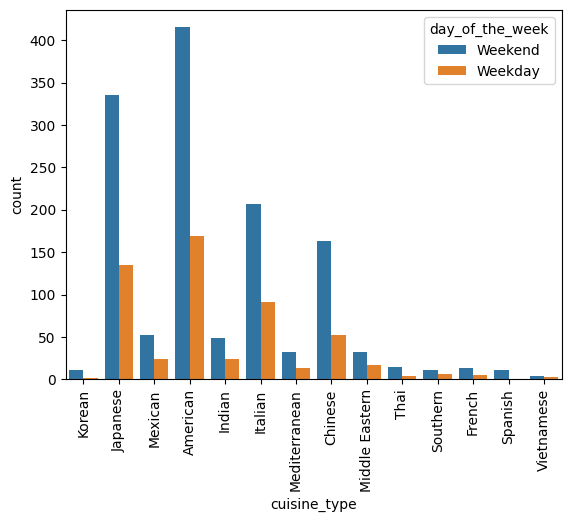

In [29]:
# Countplot cuisine_type, hue day_of_the_week
plt.xticks(rotation=90);
sns.countplot(data=df, x='cuisine_type', hue='day_of_the_week')
# American and japanese food are the most ordered food during the whole week

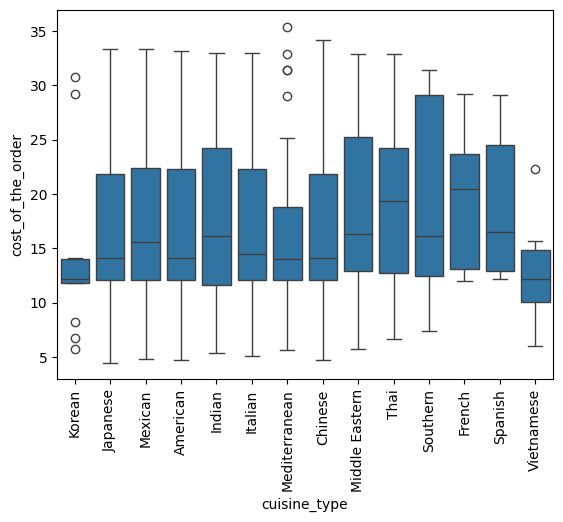

In [30]:
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order')
plt.xticks(rotation=90);
#Vietnamese and Korean are the cheapest kinds of food

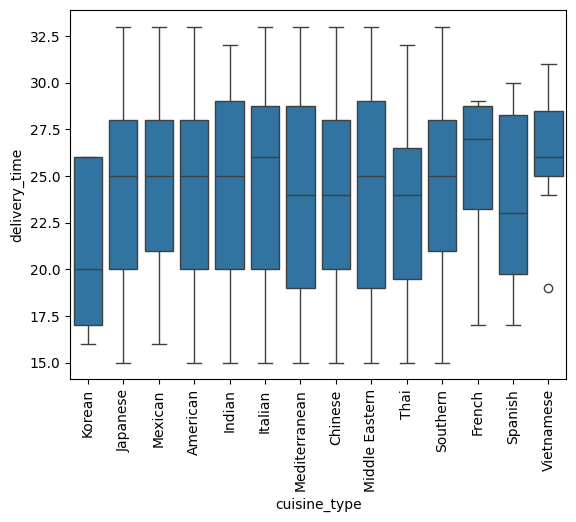

In [31]:
sns.boxplot(data=df, x='cuisine_type', y='delivery_time')
plt.xticks(rotation=90);
plt.show()

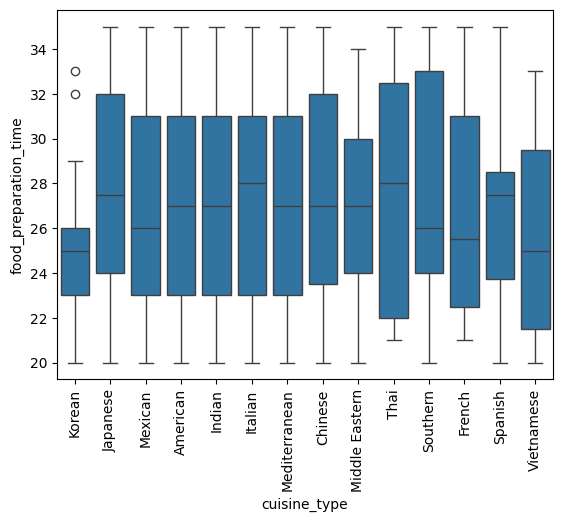

In [32]:
sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time')
plt.xticks(rotation=90);
plt.show()
#The faster food to prepare in general is the Korean. But there are some orders that took much longer than expected (2 outliers)

Day of the week

- Price
- Preparation time
- Delivery Time

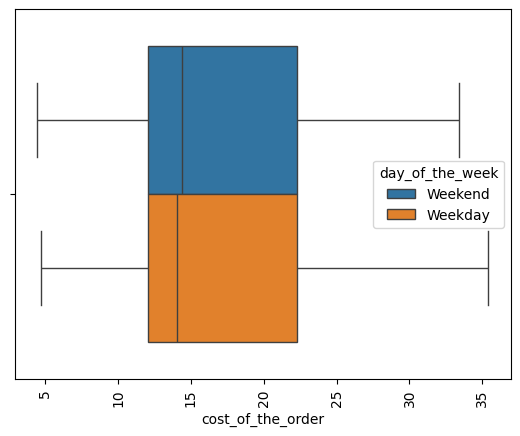

In [33]:
sns.boxplot(data=df, x='cost_of_the_order', hue='day_of_the_week')
plt.xticks(rotation=90);
#Small difference in cost of the order, being the median a little bit higher on the weekend, but interestedly during the weekdays some order have a higher price

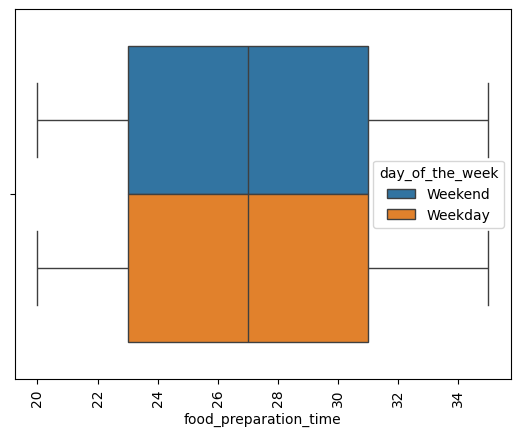

In [34]:
sns.boxplot(data=df, x='food_preparation_time', hue='day_of_the_week')
plt.xticks(rotation=90);
#No major differences

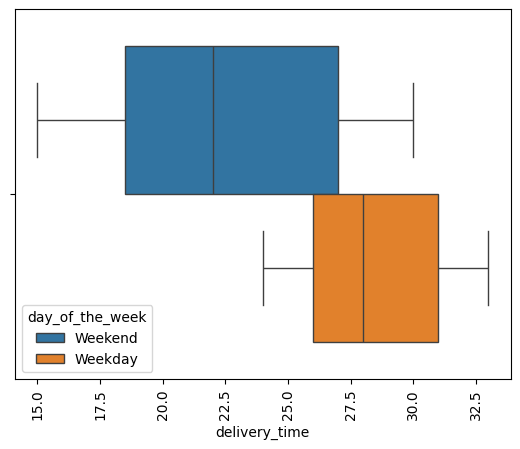

In [35]:
sns.boxplot(data=df, x='delivery_time', hue='day_of_the_week')
plt.xticks(rotation=90);
#Delivery time during the week is higher during the week. During the weekend the better traffic could make deliveries easier

Rating

- Price
- Delivery time
- Food preparation time

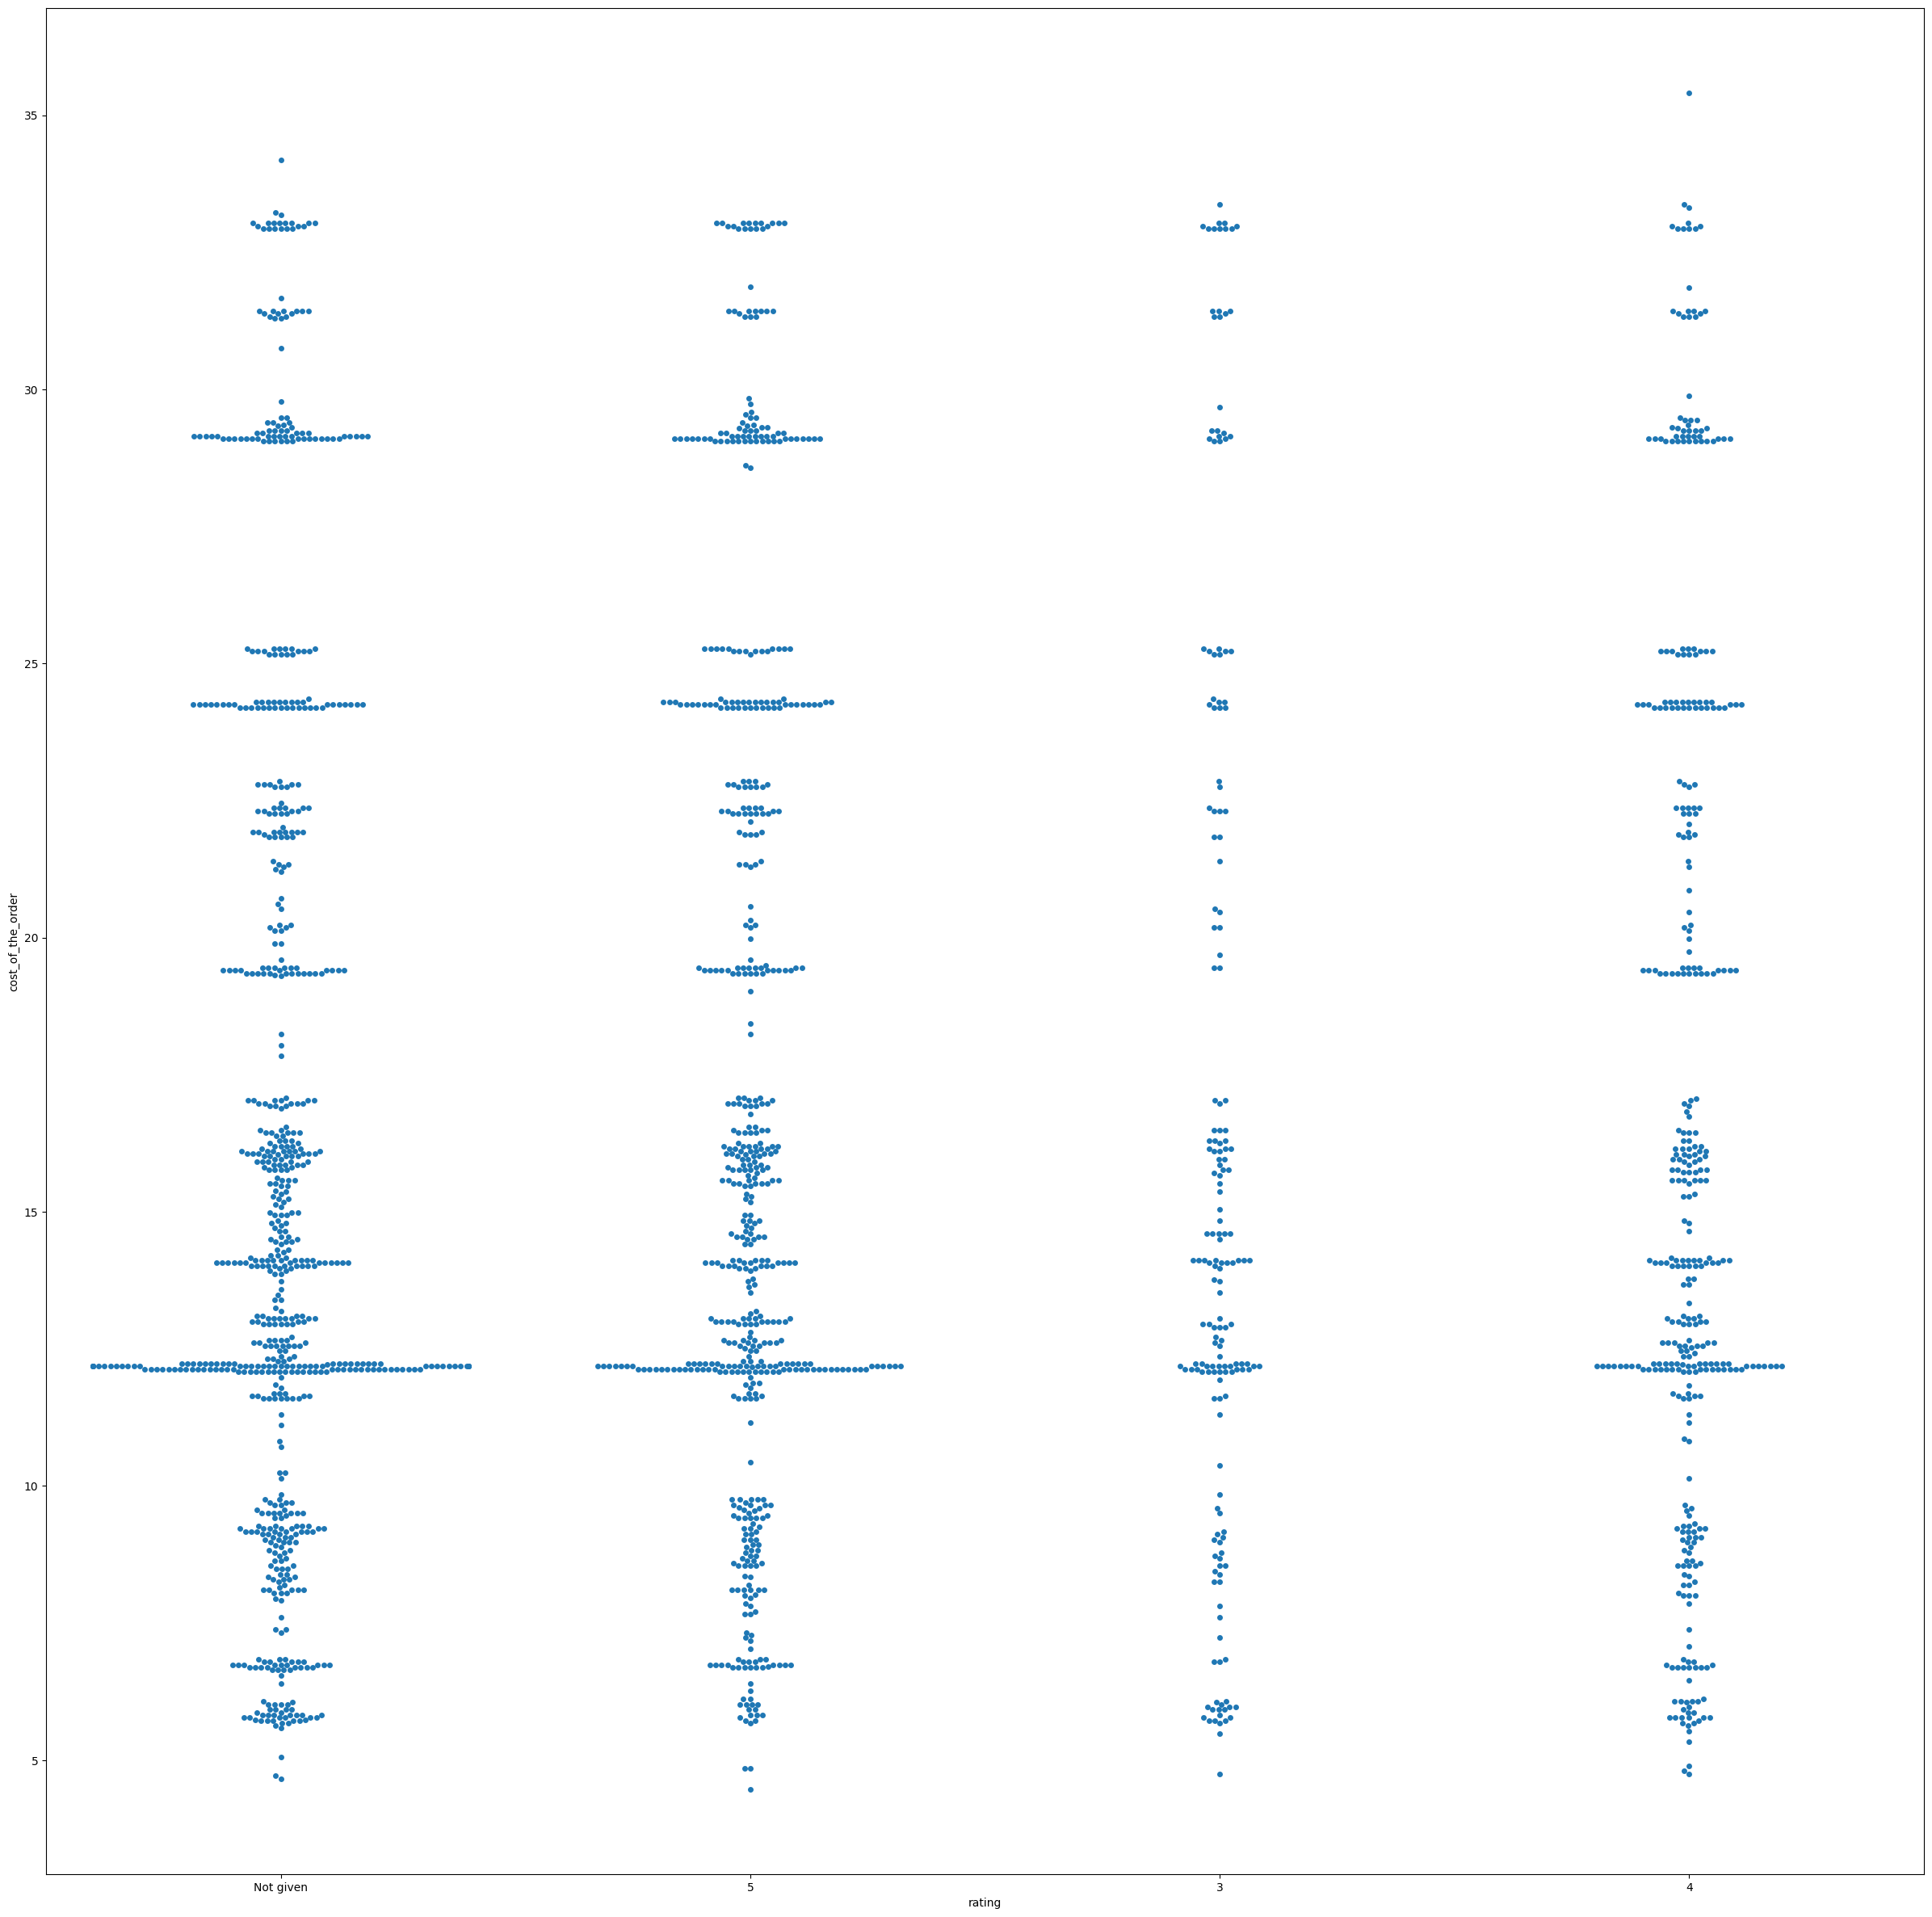

In [36]:
plt.figure(figsize=(30,30))
sns.swarmplot(data=df, x='rating', y='cost_of_the_order');

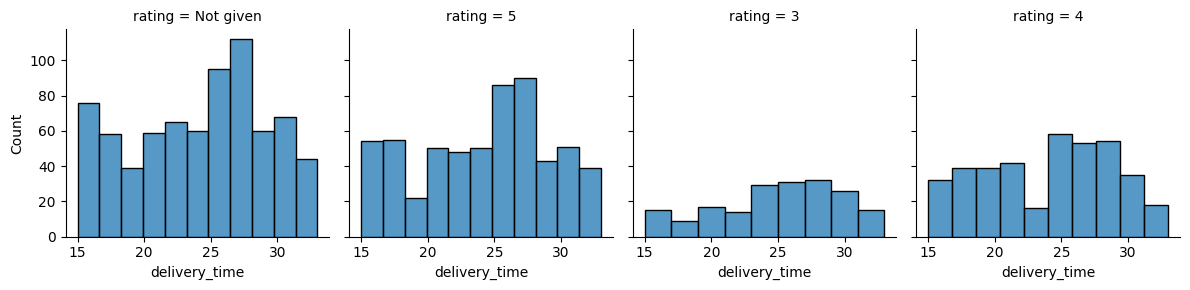

In [37]:
rating_grid = sns.FacetGrid(df, col='rating')
rating_grid.map(sns.histplot, 'delivery_time');

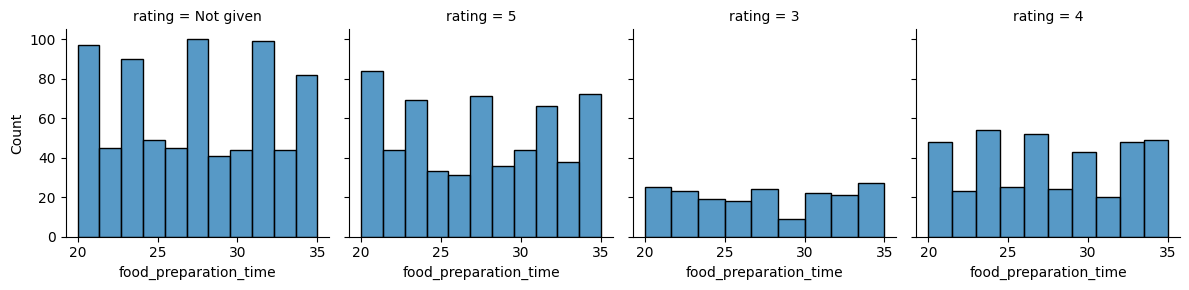

In [38]:
rating_grid = sns.FacetGrid(df, col='rating')
rating_grid.map(sns.histplot, 'food_preparation_time');

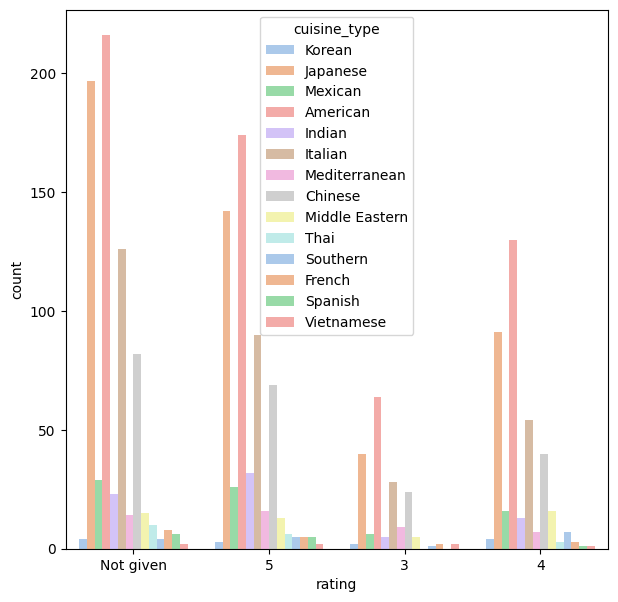

In [39]:
plt.figure(figsize=(7,7))
sns.countplot(data=df, x='rating', hue='cuisine_type', palette='pastel')
plt.show()
#Most of the orders didn't receive a rate. But the ones that got one tends to get a 5 or 4 stars rating.

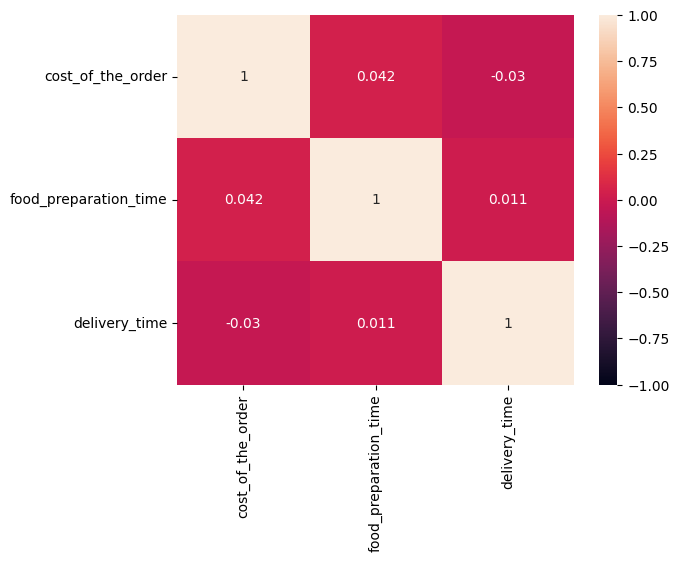

In [40]:
heatmap_list = ['cost_of_the_order', 'food_preparation_time','delivery_time']
sns.heatmap(data=df[heatmap_list].corr(), annot=True, vmin=-1, vmax=1);
#As is, the data can't be correlated to rating. Another dataframe could be needed. Even then the correlation between the varibales are pretty low.

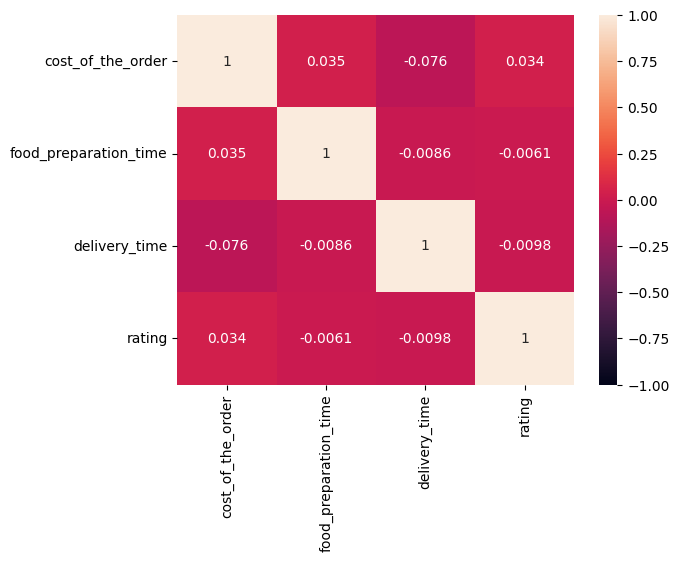

In [41]:
df_rating_given = df[df['rating'] != 'Not given']
heatmap_list = ['cost_of_the_order', 'food_preparation_time','delivery_time', 'rating']
sns.heatmap(data=df_rating_given[heatmap_list].corr(), annot=True, vmin=-1, vmax=1);
# As mentioned before the rating (of the orders that where actually rated) has a really low correlation with other variables.
# The variable with the highest correlation with rating is cost of the order, but this correlation is still low.

There is no much relation between these variables. The best correlation is 0.042 that is still low.



### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [42]:
# Filter the rated restaurants
df_rv = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rv['rating'] = df_rv['rating'].astype(int)

# Group by restaurant name and count ratings
df_2 = df_rv.groupby('restaurant_name')['rating'].count().reset_index().sort_values(by='rating', ascending=False)

# Filter restaurants with more than 50 reviews
df_2 = df_2[df_2['rating'] > 50]

# Extract restaurant names
names = df_2['restaurant_name'].tolist()

# Filter the original dataframe to include only the restaurants with more than 50 reviews
df_3 = df_rv[df_rv['restaurant_name'].isin(names)]

# Calculate the mean rating for each restaurant
mean_ratings = df_3.groupby('restaurant_name')['rating'].mean().sort_values(ascending=False).reset_index()
mean_filtered = mean_ratings[mean_ratings['rating'] > 4]

# Display the result
print(mean_filtered)

             restaurant_name  rating
0          The Meatball Shop    4.51
1  Blue Ribbon Fried Chicken    4.33
2                Shake Shack    4.28
3          Blue Ribbon Sushi    4.22


#### Observations:
There are only four restaurant of the whole list that can benefit form this promotional offer (restaurant that have more than 50 revies and with an average rating greater than 4. These restaurant are

- The Meatball Shop
- Blue Ribbon Fried Chicken
- Shake Shack
- Blue Ribbon Sushi

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [43]:
#define function to calculate revenue
def cal_rev(cost):
    if cost > 20:
        return cost * 0.25
    elif cost > 5:
        return cost * 0.15

In [44]:
# create new data frame only with orders above 5
df_cost = df[df['cost_of_the_order'] > 5 ]['cost_of_the_order'].copy()

df_revenue = df_cost.apply(cal_rev)
df_revenue.info()
print(f'The total revenue for the company is ${df_revenue.sum().round(2)}')

<class 'pandas.core.series.Series'>
Index: 1889 entries, 0 to 1897
Series name: cost_of_the_order
Non-Null Count  Dtype  
--------------  -----  
1889 non-null   float64
dtypes: float64(1)
memory usage: 29.5 KB
The total revenue for the company is $6166.3


#### Observations:
- The company total revenue is $6166.3 up to date.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [45]:
# Create dataframe where we can have a new column that is the sum of preparation_time and delivery_time
df_time = df[['delivery_time','food_preparation_time']].copy()
df_time['total_time'] = df_time['delivery_time'] + df_time['food_preparation_time']
print(df_time.describe().T)
percentage = ((df_time[df_time['total_time'] > 60 ].shape[0] / df_time.shape[0]) * 100)
print( "*" * 40)
print(f'The percentage of orders that take more than 60 minutes to get delivered is {round(percentage,2)}%')

                        count  mean  std   min   25%   50%   75%   max
delivery_time         1898.00 24.16 4.97 15.00 20.00 25.00 28.00 33.00
food_preparation_time 1898.00 27.37 4.63 20.00 23.00 27.00 31.00 35.00
total_time            1898.00 51.53 6.83 35.00 47.00 52.00 56.00 68.00
****************************************
The percentage of orders that take more than 60 minutes to get delivered is 10.54%


#### Observations:
- Only 10.54% of the orders analyzed took more than 60 minutes to be delivered. Where the maximum time to get delivered was 68 minutes and the minimum 35 minutes.



### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [46]:
# create new dataframe with delivery times and day of the week
df_week = df[['day_of_the_week', 'delivery_time']].copy()
df_week.groupby('day_of_the_week')['delivery_time'].mean()

day_of_the_week
Weekday   28.34
Weekend   22.47
Name: delivery_time, dtype: float64

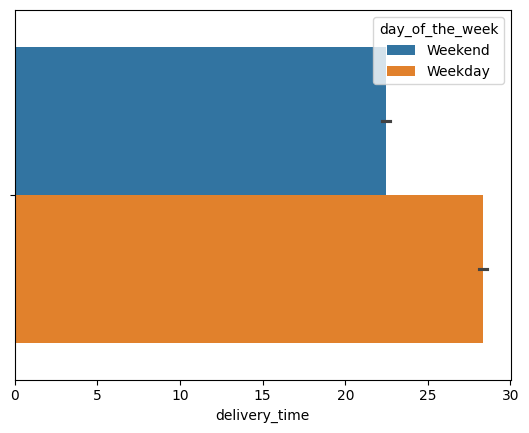

In [47]:
sns.barplot(data=df_week, x='delivery_time', hue='day_of_the_week');

#### Observations:
The average delivery time during the weekend is aroung 6 minutes faster than the average delivery time during the week, this could be related to traffic issues during the week.

- The average Weekday delivery time is 28.34 minutes
- The average Weekend delivery time is 22.47 minutes

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
- The majority of orders are placed in the weekend, where the delivery time is also better than the delivery time on week days.
- The most popular food types are American, Japanese and Italian. This is true during the weekend and week days.
- More than 10% of the orders take more than 60 minutes to be prepared and delivered.
- The majority of orders are not rated, but the ones that are rated usually receive a good rating. The majority of the orders that are rated, got a 5. No orders were rated 0, 1 or 2.
- The majority of orders cost less than 20 dollars (around 70%).

### Recommendations:

- As discussed before, the majority of the orders weren't rated, missing some important data that could be used for further analysis. It could be a good idea to either mandate clients to rate the orders (and possibly ask for more aspects of the transaction, like how they rate the delivery time, the food, the price, etc.). If mandatory rating is not appropriate, giving some incentives (like discounts on the next order) may be a good option to increase the number of ratings given.

- Offering some discounts, loyalty programs, etc., could be a good option to increase the amount of orders in general, focusing especially on weekdays where the orders are not as many as those on the weekend.

- As the majority of the orders (about 70%) are cheaper than 20USD , it may be a good option to modify the percentage of money charged to the restaurant, like increasing the percentage charged on cheaper orders and decreasing the percentage on those over 20USD. This may need some extra analysis and may be out of the scope of this particular analysis.

- It could be good to include dates on the data gathered in the future to analyze other factors like, in general, how often people order food. For now, we can only know when the food is ordered in terms of weekdays or weekends, but we can't analyze how separated the orders are. For example, we don't know the period of time considered for the analysis. So we can't determine how often clients are ordering food. Did the client that ordered 13 times do that during 1 month? 6 months? 1 year? Or during the whole time they have been using the app?

- We know that American, Japanese, and Italian food are the most ordered, so something needs to be done to increase sales of the other types of under-ordered food. It may be a good idea to negotiate better deals with those restaurants to find better options for both them and the clients.

- Following the last recommendation, focusing on your best-seller foods could be great for the business since they are already proven favorites. The management and marketing departments should find ways to drive more (and hopefully higher value) sales to these restaurants.

- Almost 10% of the orders take more than an hour to be prepared and delivered. Some extra analysis might be needed to see how this affects the client experience. With the current data, we can't really tell if the clients were happy or not with the preparation and delivery times, as this isn’t directly related to the food reviews. This reinforces the idea of having clients rate multiple aspects of their experience.

---